# Traffic Violators Feature Prediction

## I. Introduction
  - Chen, H., Chung, W., Xu, J.J., Wang, G., Qin, Y., Chau, M.: Crime data mining: a general framework and some examples. computer 37(4) (2004) 50–56
  - Md Amiruzzaman, Kent State University, Kent, OH 44242, USA: Prediction of Traffic-Violation Using Data Mining Techniques
  - https://www.encyclopedia.com/law/encyclopedias-almanacs-transcripts-and-maps/traffic-violations#:~:text=Department%20of%20Transportation-,Background,of%2012%20miles%20per%20hour.


### 1. Domain-specific area: Traffic Rule Violation
I've always been interested in anything related to the crime world and understanding the psychology of the perpetrators so while looking for topics I found this dataset which I thought was the perfect fit for this assignment.

A traffic violation is any violation of vehicle laws that is committed by the driver of a vehicle.
Traffic violations followed the invention of the automobile. The first traffic ticket in the United States was allegedly given to a New York City cab driver on May 20, 1899, for going at the breakneck speed of 12 miles per hour. Since that time, countless citations have been issued for traffic violations across the country, and states have reaped untold billions of dollars of revenue from violators.

The most common type of traffic violation is a speed limit violation among the many other types of violations. I would like to explore motivational factors which makes the driver violate if I do find one.

Traffic rules are important for safety as traffic laws are to prevent drivers from causing accidents or hitting pedestrians. They are also to help control the flow of traffic so that it is more
efficient. There are number of reasons that causes traffic-violations. As the number of vehicles are increasing every day, so does the chance of traffic violation and they often lead to road accidents and injuries.

Chen et al. classified different types of crime at different law-enforcement
level. Such as, sex crime in law-enforcement level two, and theft (e.g., robbery,
burglary, larceny, etc.) in law-enforcement level three. In their classification,
traffic-violation is one of the common local crimes. In general, bad weather,
unskilled drivers, drunk drivers, and drivers who pay less attention while driving
may cause traffic-violations, as well as road accidents. However, there may be
some other contributing reasons that may lead to traffic-violations and road ac-
cidents. For example, speeding, reckless driving, driving under influence of drugs
or alcohol, hit-and-run, road rage, etc. My focus will mainly be on crimes
and who is committing them, rather than traffic-violations.

### 2. Dataset
I was looking for a dataset which had some flaws so I could show my cleaning skills and have enough data to make me ask question I would like to look into so I could complete all the steps outlined in this assignment.

This dataset had many column headings which related to the questions I would have if I were to carry out an analysis on traffic violations e.g age, gender, race, type etc.
Another reason was the dataset had the right amount of data I needed for this project i.e not too memory reliant and lightweight.

#### Source
  - https://www.kaggle.com/datasets/shubamsumbria/traffic-violations-dataset 
  - Traffic and Drugs Related Violations Dataset, its method of collection has not been stated. The dataset can be accessed via the Kaggle official website
  
#### Dataset details

Contains 52966 rows × 15 columns  
This dataset has around 53 000 traffic violation records with the following attributes:

 - stop_date - Date of violation
 - stop_time - Time of violation
 - driver_gender - Gender of violators (Male-M, Female-F)
 - driver_age - Age of violators when the violation occured
 - driver_race - Race of violators
 - violation - Category of violation :
    - Speeding
    - Moving Violation (Reckless Driving, Hit and run, Assaulting another driver, pedestrian, improper turns and lane changes, etc)
    - Equipment (Window tint violations, Headlight/taillights out, Loud exhaust, Cracked windshield, etc.)
    - Registration/Plates
    - Seat Belt
    - other (Call for Service, Violation of City/Town Ordinance, Suspicious Person, Motorist Assist/Courtesy, etc.)
 - search_conducted - Whether search is conducted in True and False form
 - stop_outcome - Result of violation
 - is_arrested - Whether a person was arrested in True and False form
 - stop_duration - Detained time for violators approx (in minutes)
 - drugsrelatedstop - Whether a person was involved in drugs crime (True, False)

#### License

License - Other 

From https://www.kaggle.com/general/116302 the meaning of Other    

"    
Other  
Additional License Coverage Options  
If a license is not listed in the data.world menu options, you may select Other and specify the details in the summary of your dataset.   
  
No license specified    
No one can use, share, distribute, re-post, add to, transform or change your dataset if you have not specified a license.    
   
These descriptions are only summaries of these licenses. For the actual text of the licenses, which we strongly encourage you to read, click on the links provided.     
"    
    
Basically the summary of the dataset has not specified the type of license so the license is unknown

### 3. Objectives of the project
The purpose of this study is to predict traffic-violations based on previous
incidents and to find any relationship worth looking into that would ask for some analysis skills  which would then help me to utilize regression analysis to develop prediction models. The findings of this study (which I by no means say is reliable as the dataset could be biased or I could make mistakes etc.) could help prevent some traffic-violations or reduce the chance of occurrence by finding the attributes of a person who is likely to commit a traffic violation.
These results can be used to increase cautions and traffic-safety tips

Some of the question I plant on investigating are as follows:
  - Hour in which violation frequently occurs
  - Age and violation correlation
  - Race ratio and violation correlation
  - Violation under the influence of drug and age correlation
  - Predict who is likely to commit a violation

## II. Implementation

In [42]:
# Import libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve
from sklearn.metrics import mean_squared_error
import math


# Set all graphs to a seaborn style with a grey background grid which makes reading graphs easier
sns.set()

### 1. Preprocessing
The data is a csv file and has been locally downloaded. All modification will be made on a dataframe so the file will not be distorted.

#### Data cleaning & modifications
 - Creating the dataframe
 - Making the dataframe so to clean it up for the analysis

In [43]:
#import csv
dataset = pd.read_csv("Dataset/traffic_violaions.csv")
dataset.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [44]:
# showing the dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


I will be visualising the missing value using the misssingno library  
This article guided me through this process: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

<AxesSubplot:>

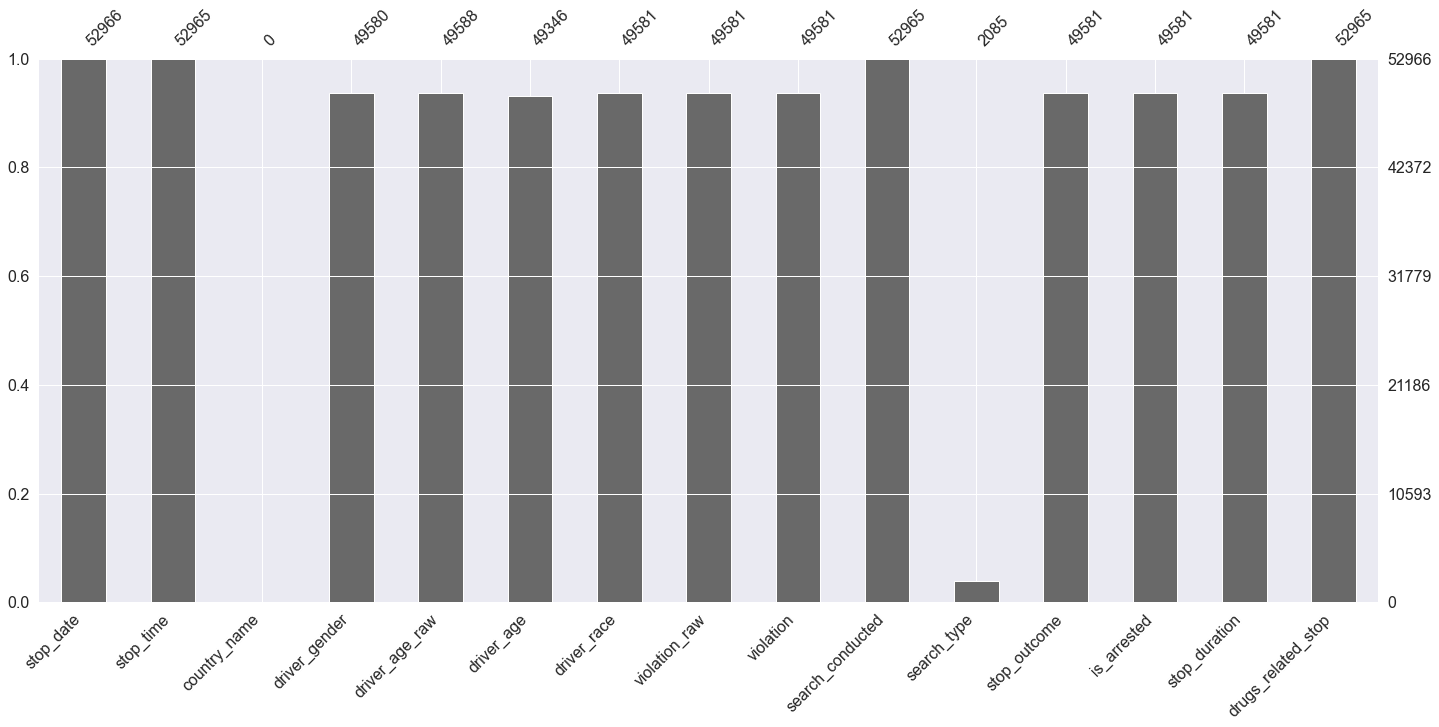

In [45]:
# The barplot provides a simple plot where each bar represents a column within the dataframe
msno.bar(dataset)

We can clearly see that country name and search type are seriously missing values.
I am going to drop these 2 columns as there are too many missing values for it to be of any use.

In [46]:
dataset.drop(columns = ["country_name", "search_type"], inplace=True, axis=1)

<AxesSubplot:>

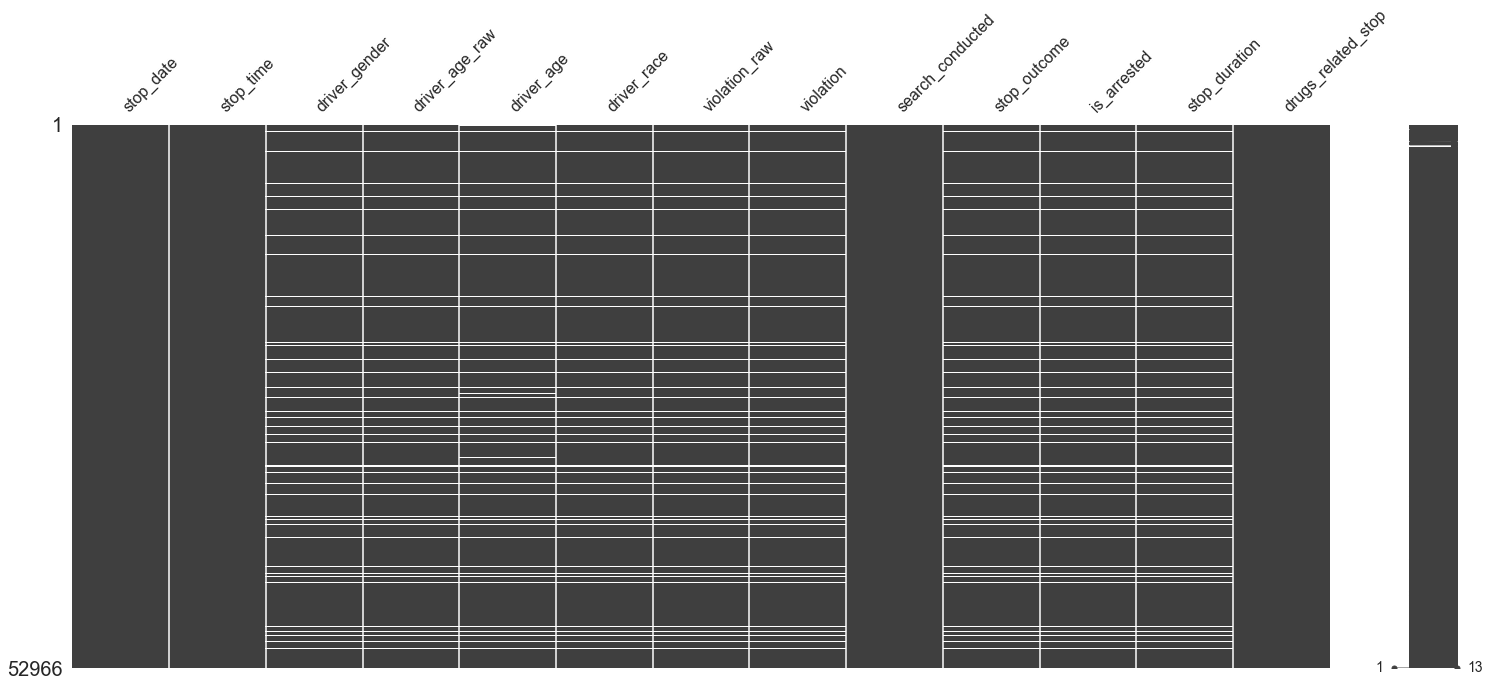

In [47]:
# Matrix plots allow you to plot data as color-encoded matrices 
# and can also be used to indicate clusters within the data
msno.matrix(dataset)

We can see that if there are empty value it is consistent in that row so it will be sensible removing rows containing null values

<AxesSubplot:>

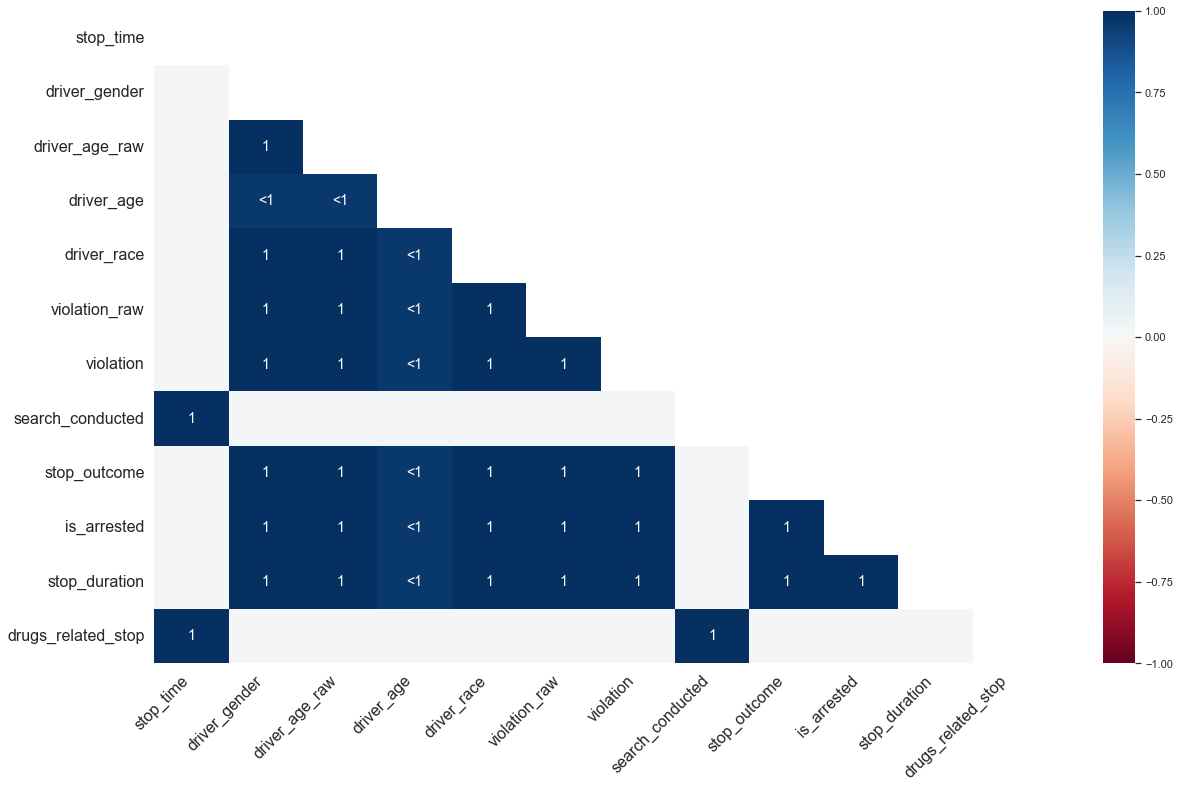

In [48]:
# The heatmap is used to identify correlations of the nullity between each of the different columns.
# Nullity correlation ranges from -1 (if one variable appears the other definitely does not) 
# to 0 (variables appearing or not appearing have no effect on one another) 
# to 1 (if one variable appears the other definitely also does).
# <1 or >-1 have a correlation that is close to being exactingly negative or positive
msno.heatmap(dataset)

As you can see in the above plot theres a strong correlation between the missing value so even the driver_age is very close to 1 so I think it safe to remove rows where null values are found in them

In [49]:
dataset.dropna(subset = ["driver_gender"], inplace=True)
dataset

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52956,10/4/2011,22:22,M,1979.0,32.0,White,Speeding,Speeding,False,Arrest Driver,True,0-15 Min,False
52958,10/4/2011,22:36,F,1967.0,44.0,Hispanic,Speeding,Speeding,False,Citation,False,0-15 Min,False
52959,10/4/2011,23:25,F,1991.0,20.0,Black,Speeding,Speeding,False,Citation,False,0-15 Min,False
52962,10/5/2011,6:43,M,1986.0,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


Removing drive_age_raw as I see no need for it as I only need the age of the violator for when the violation happened and I have that information in driver_age column

In [50]:
dataset.drop("driver_age_raw", inplace=True, axis=1) 
dataset.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [51]:
# checking for missing values
dataset.isnull().sum()

stop_date               0
stop_time               0
driver_gender           0
driver_age            240
driver_race             0
violation_raw           0
violation               0
search_conducted        0
stop_outcome            0
is_arrested             0
stop_duration           0
drugs_related_stop      0
dtype: int64

<AxesSubplot:>

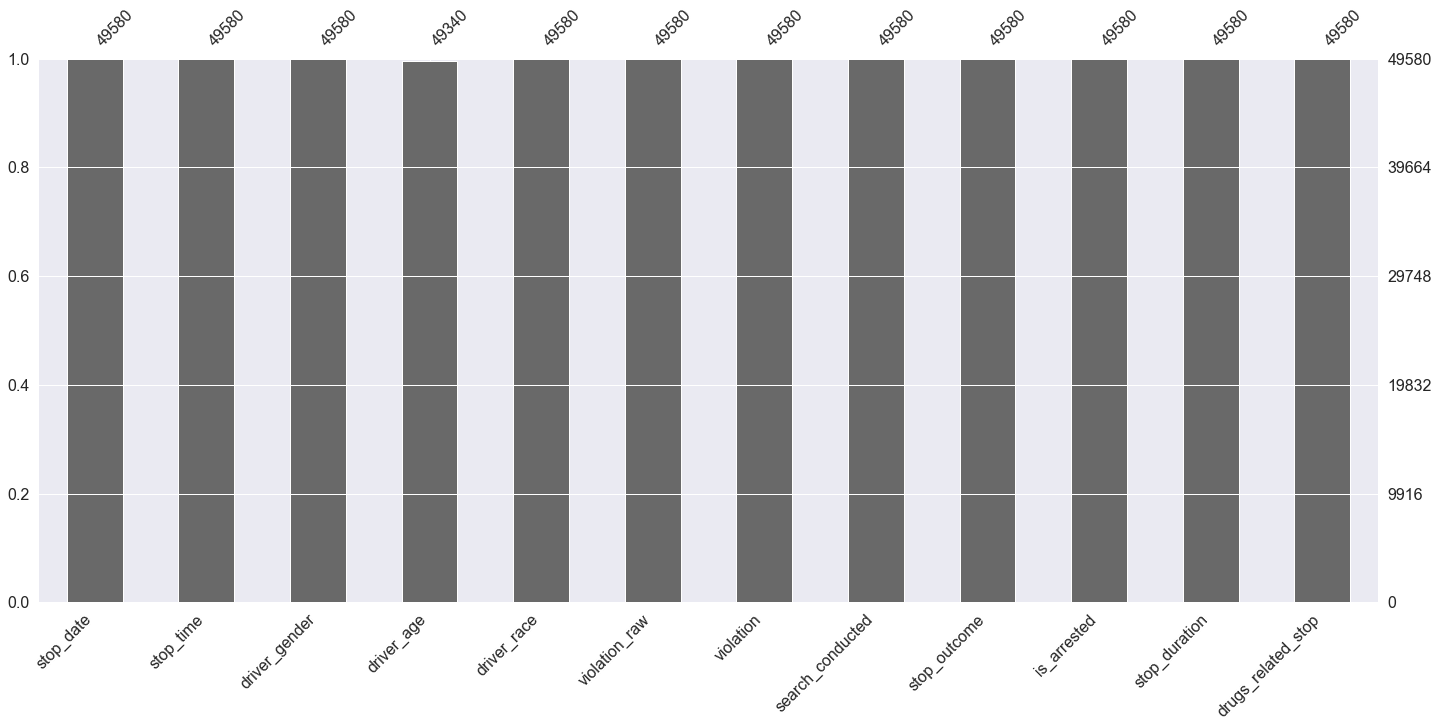

In [52]:
# rechecking using bar plot
msno.bar(dataset)

The bar and the list both shows that there is still 240 missing value in the driver age column.
I found this reddit article while finding ways to deal with missing age and decided to use the mean of the group with same charateristic.
https://stackoverflow.com/questions/61310486/filling-missing-age-in-titanic-dataset  
I chose characteristic that would make sense when talking about the age like the gender & race. Maybe the race could be excluded as this dataset could be skewed towards a particular race but I decided to keep it in.

<AxesSubplot:>

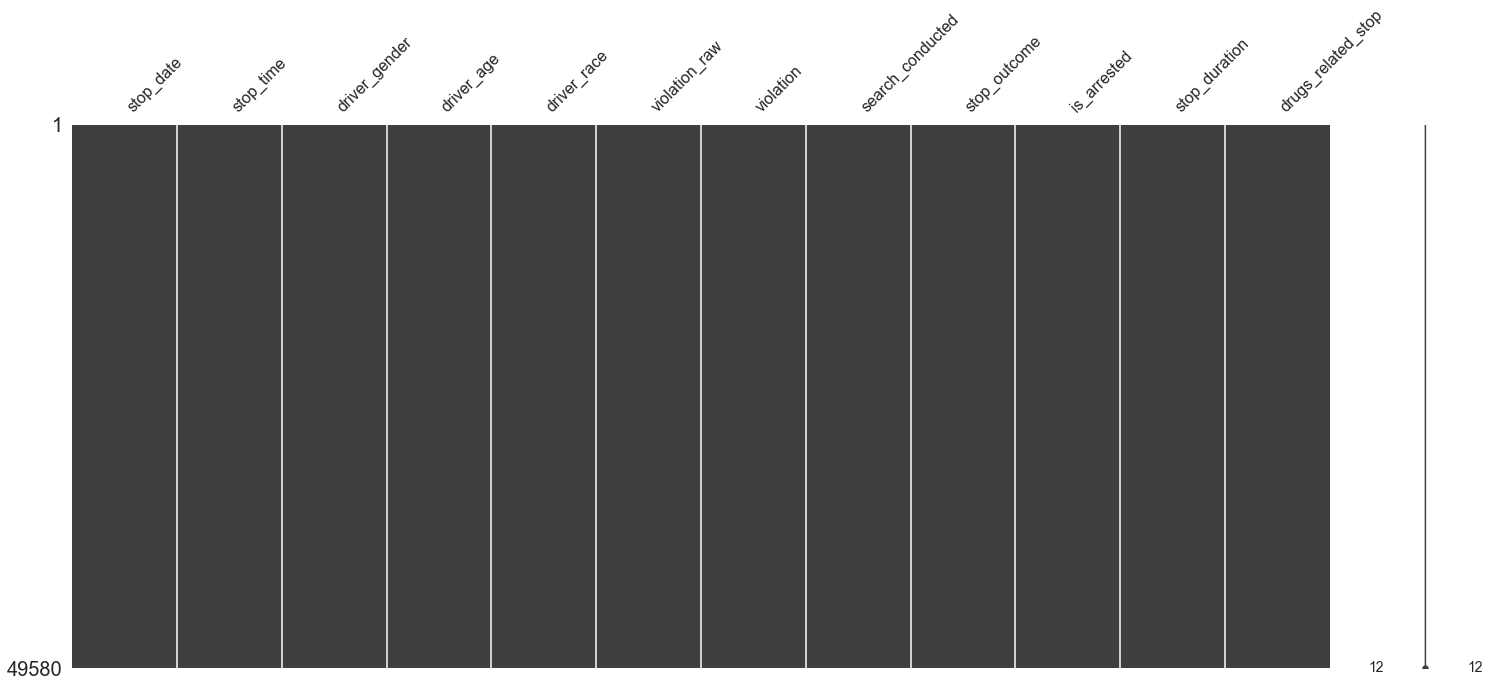

In [53]:
l_col = ["driver_gender", "driver_race"]
dataset["driver_age"] = dataset["driver_age"].fillna(dataset.groupby(l_col)["driver_age"].transform("mean"))
msno.matrix(dataset)

I think the dataset is now perfectly ready to be analyzed with a few more tweaks needed

In [54]:
# copying the modified dataframe to a new variable
cleaned_data = dataset.copy()
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49580 entries, 0 to 52964
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           49580 non-null  object 
 1   stop_time           49580 non-null  object 
 2   driver_gender       49580 non-null  object 
 3   driver_age          49580 non-null  float64
 4   driver_race         49580 non-null  object 
 5   violation_raw       49580 non-null  object 
 6   violation           49580 non-null  object 
 7   search_conducted    49580 non-null  object 
 8   stop_outcome        49580 non-null  object 
 9   is_arrested         49580 non-null  object 
 10  stop_duration       49580 non-null  object 
 11  drugs_related_stop  49580 non-null  object 
dtypes: float64(1), object(11)
memory usage: 4.9+ MB


I would like to change some of the column name i.e the gender, age and race column name as I see it will not affect the analysis much if I shortened it and it will be much easier for the eyes to read.

In [55]:
cleaned_data.rename(columns={'driver_gender': 'gender', 
                             'driver_age': 'age', 
                             'driver_race': 'race'}, inplace = True)

I would further like to change the datatype of certain column for more appropriate one  
Help used for this part  
 - https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime
 - format: '%d/%m/%y %H:%M:%S
 - https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html 

In [56]:
# convert column to datetime pandas
cleaned_data['stop_date'] = pd.to_datetime(cleaned_data['stop_date'])
# extract the hour from the stop_time for future comparison
cleaned_data['stop_hour'] = pd.to_datetime(cleaned_data['stop_time'], format='%H:%M').dt.hour
cleaned_data.head()

,stop_date,stop_time,gender,age,race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour
0,2005-01-02,1:55,M,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1
1,2005-01-18,8:15,M,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,8
2,2005-01-23,23:15,M,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,23
3,2005-02-20,17:15,M,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,17
4,2005-03-14,10:00,F,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,10


search_conducted, is arrested has boolean True/False values, but for further calculations I need 1/0 representation. I found this at the end so doing it up here to make it look clean.
https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe

In [57]:
cleaned_data["search_conducted"] = cleaned_data["search_conducted"].astype(int)
cleaned_data.head()

,stop_date,stop_time,gender,age,race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour
0,2005-01-02,1:55,M,20.0,White,Speeding,Speeding,0,Citation,False,0-15 Min,False,1
1,2005-01-18,8:15,M,40.0,White,Speeding,Speeding,0,Citation,False,0-15 Min,False,8
2,2005-01-23,23:15,M,33.0,White,Speeding,Speeding,0,Citation,False,0-15 Min,False,23
3,2005-02-20,17:15,M,19.0,White,Call for Service,Other,0,Arrest Driver,True,16-30 Min,False,17
4,2005-03-14,10:00,F,21.0,White,Speeding,Speeding,0,Citation,False,0-15 Min,False,10


In [58]:
cleaned_data["is_arrested"] = cleaned_data["is_arrested"].astype(int)
cleaned_data.head()

,stop_date,stop_time,gender,age,race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour
0,2005-01-02,1:55,M,20.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,False,1
1,2005-01-18,8:15,M,40.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,False,8
2,2005-01-23,23:15,M,33.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,False,23
3,2005-02-20,17:15,M,19.0,White,Call for Service,Other,0,Arrest Driver,1,16-30 Min,False,17
4,2005-03-14,10:00,F,21.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,False,10


Also changing the gender column value to 1 and 0 where 
1 = Female and 0 = Male

In [59]:
cleaned_data['gender'].replace({'M': 0,'F': 1}, inplace=True)
cleaned_data.head()

,stop_date,stop_time,gender,age,race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour
0,2005-01-02,1:55,0,20.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,False,1
1,2005-01-18,8:15,0,40.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,False,8
2,2005-01-23,23:15,0,33.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,False,23
3,2005-02-20,17:15,0,19.0,White,Call for Service,Other,0,Arrest Driver,1,16-30 Min,False,17
4,2005-03-14,10:00,1,21.0,White,Speeding,Speeding,0,Citation,0,0-15 Min,False,10


In [60]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49580 entries, 0 to 52964
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           49580 non-null  datetime64[ns]
 1   stop_time           49580 non-null  object        
 2   gender              49580 non-null  int64         
 3   age                 49580 non-null  float64       
 4   race                49580 non-null  object        
 5   violation_raw       49580 non-null  object        
 6   violation           49580 non-null  object        
 7   search_conducted    49580 non-null  int32         
 8   stop_outcome        49580 non-null  object        
 9   is_arrested         49580 non-null  int32         
 10  stop_duration       49580 non-null  object        
 11  drugs_related_stop  49580 non-null  object        
 12  stop_hour           49580 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), in

It is now ready for real this time

### 2. Exploratory data analysis

Identify key series of the dataset and provide statistical summary of the data
By identifying key series of the dataset I understood it as attributes of the dataset which are key to my analyses. What I think are key series of the dataset for my current study are violation, stop_hour, age, race and gender. 

In [61]:
# for a new section the dataframe is being handed down to a new variable
data = cleaned_data.copy()

Histograms allow seeing the distribution of data for various columns.

(array([37363.,  6594.,  1375.,  4099.,   149.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

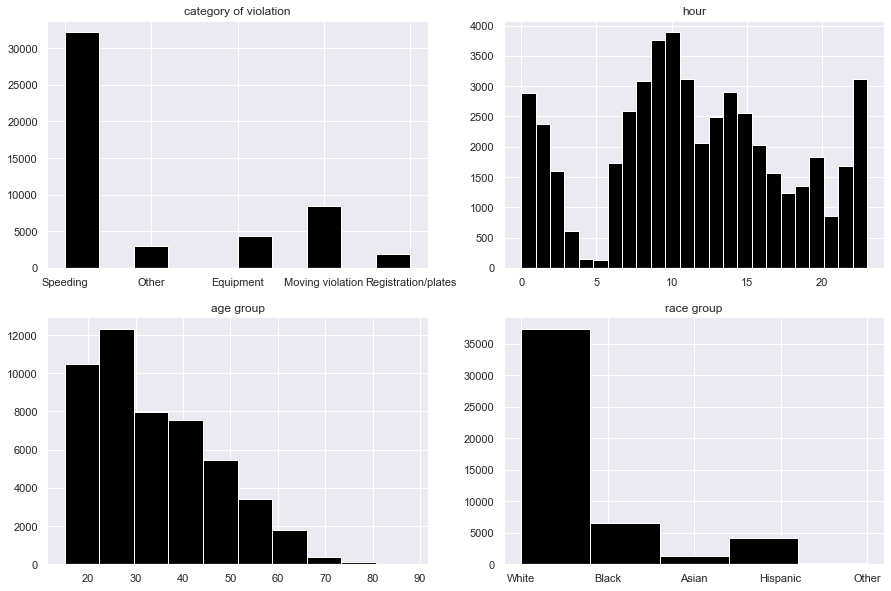

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

# First row
axes[0,0].set_title("category of violation")
axes[0,0].hist(data['violation'], color='black', alpha=1)
axes[0,1].set_title("hour")
axes[0,1].hist(data['stop_hour'], bins=24, color='black', alpha=1)

# Second row
axes[1,0].set_title("age group")
axes[1,0].hist(data['age'], color='black', alpha=1)
axes[1,1].set_title("race group")
axes[1,1].hist(data['race'], bins=5, color='black', alpha=1)

From the data above:
  - it can be seen that speeding is the most common traffic violation and it follows what I had found while writng the introduction on what is the most common traffic violation.
  - violation were most frequent as early as 7:00 in the morning until 15:00 in the afternoon and it got more frequent again between 23:00 and midnight. The frequency was lower after midnight and late evening hours.
  - 20 to 50 age group covers most of the violation. The minimum age of someone has been as low 15 and as high as 88
  - the traffic violator consist of mostly White, Black, Asian & Hispanic with unnoticeable amount of other race. From among them the chart shows that the white race were the one with the most traffic violators with a substantial 75%. This made me wonder as I expected a more even distribution but maybe the dataset was taken from a place where the white race is very eminent and other race are outliers makign the dataset skewed.

Gender and violations correlation

In [63]:
# Gender count
gender = data['gender'].value_counts()
gender

0    36564
1    13016
Name: gender, dtype: int64

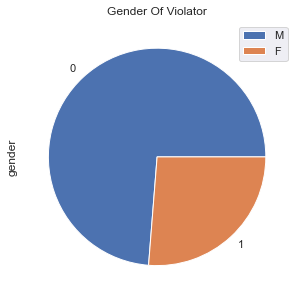

In [64]:
fig = plt.figure(figsize =(5, 5))
gender.plot.pie()
plt.title('Gender Of Violator')
plt.legend(['M',"F"])

As it can be seen from the above pie chart the majority of violations were done by men.

#### Now lets explores some relationship & see if there is a correlation:

##### Age and gender

In [65]:
# Generates descriptive statistics of the age column
data["age"].describe()

count    49580.000000
mean        34.173629
std         12.739553
min         15.000000
25%         23.000000
50%         31.000000
75%         43.000000
max         88.000000
Name: age, dtype: float64

In [66]:
# group gender and age by the gender column
data[["gender", "age"]].groupby("gender").mean()

,age
gender,
0,34.840543
1,32.300165


gender
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

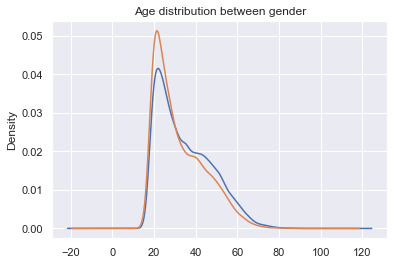

In [67]:
# plots the gender against age distribution
data.groupby('gender').age.plot(kind='kde', title = "Age distribution between gender")

Observations 
 - 20 to 50 age group covers most of the violation
 - The minimum age of someone has been as low 15 and as high as 88
 - The female and male has similar structure to their wave and their respective mean value are also close together which shows that gender has no correlation with act of violation but the male violator has the highest peak so maybe females are better drivers?

##### Hour of the day and violation occurence
Should the road be avoided during certain hours of the day

In [68]:
# returns the mode of the stop_hour
data['stop_hour'].mode()

0    10
Name: stop_hour, dtype: int64

<AxesSubplot:xlabel='stop_hour', ylabel='count'>

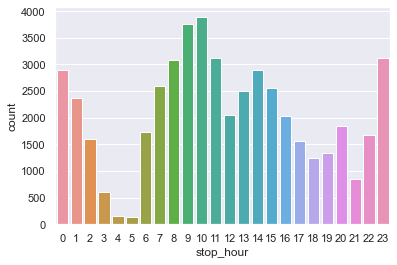

In [69]:
# plots the stop_hour against its amount
sns.countplot(x="stop_hour", data=data)

My parameter for determining what to choose for the frquent list was if the counts exceeded the 2500 mark as it looked like the right amount to me.
 
Observations
 - Violation were most frequent as early as 7:00 in the morning until 15:00 in the afternoon and it got more frequent again between 23:00 and midnight.
 - The frequency was lower after midnight and late evening hours.
 - These same observation were made earlier as well.

##### Age and drugs relation

In [70]:
data.drugs_related_stop.value_counts()

False    49184
True       396
Name: drugs_related_stop, dtype: int64

In [71]:
# getting the values in order for every age group
drugs_and_age_sorted = data[['age','drugs_related_stop']].sort_values(by='age')
drugs_and_age_sorted

,age,drugs_related_stop
25294,15.0,False
17771,15.0,False
45988,15.0,False
10500,15.0,False
18357,15.0,False
...,...,...
23590,86.0,False
38468,86.0,False
48329,86.0,False
9829,88.0,False


In [72]:
true_cases = drugs_and_age_sorted.query('drugs_related_stop==True')
true_cases

,age,drugs_related_stop
21981,16.0,True
46315,17.0,True
37174,17.0,True
40,17.0,True
41,17.0,True
...,...,...
4909,52.0,True
51902,54.0,True
12095,55.0,True
33457,58.0,True


Text(0, 0.5, 'Frequency')

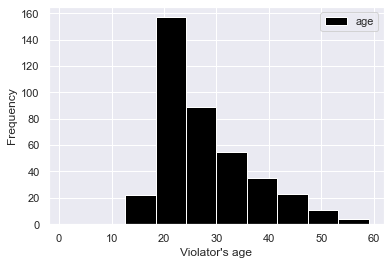

In [73]:
true_cases.plot(kind ='hist', color ='black', alpha = 1)
plt.xlabel("Violator's age")
plt.ylabel('Frequency')

From the above histogram it can be seen that the largest percentage of violations in traffic violations was between the ages of 20 to 30, with the most violations under the influence of drugs

### 3. Data regression model

  - https://www.kaggle.com/code/yadhua/predicting-arrest/notebook (for implementation help)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49580 entries, 0 to 52964
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           49580 non-null  datetime64[ns]
 1   stop_time           49580 non-null  object        
 2   gender              49580 non-null  int64         
 3   age                 49580 non-null  float64       
 4   race                49580 non-null  object        
 5   violation_raw       49580 non-null  object        
 6   violation           49580 non-null  object        
 7   search_conducted    49580 non-null  int32         
 8   stop_outcome        49580 non-null  object        
 9   is_arrested         49580 non-null  int32         
 10  stop_duration       49580 non-null  object        
 11  drugs_related_stop  49580 non-null  object        
 12  stop_hour           49580 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), in

I want to build a model to predict a person who is likely to commit a violation. This model should be able to predict whether a person which such attributes is likely to commit violation serious enough to get arrested.
I chose is_arrested instead of violation because whats important is are those violation that result in arrest and is_arrested tells just that while violation tells which violation it was stopped for not its conclusion. For me conclusion is what matters not what it was stopped for. This model should predict who is likely to be arrested for violating traffic rules. In my opinion I think that not everyone who gets stopped are likely to have an accident but those people that get arrested. Also I can get to see which crime they get arrested for and it they are of any relevance.

The feature against which the stop_outcome will be put together with to see which if any are relevant will be:
  - stop_time: To see whether there are hours of the day where one should avoid driving or drive more carefully
  - gender: is it important to look out more for a certain gender
  - age: does age hold any importance with regard to people getting arrested.
  - race: do we have to be more on the look for certain race.
  - violation: is the speeding really something to look out for.
  - search_conducted: i feel this to be of very high importance and would like to see if it holds any importance.
  - stop_hour: Is it of any importance with regards to people getting arrested.
  - stop_duration: is the duration importance on who is likely to get arrested? what duration are more likely to be arrested
  - drug_related_stop: are they important to consider. 

In [75]:
# Since stop_outcome and is_arrested talking about the same thing is it of no relevance and will
# only slow down the model.
data.drop('stop_outcome',axis=1,inplace=True)
data.head()

,stop_date,stop_time,gender,age,race,violation_raw,violation,search_conducted,is_arrested,stop_duration,drugs_related_stop,stop_hour
0,2005-01-02,1:55,0,20.0,White,Speeding,Speeding,0,0,0-15 Min,False,1
1,2005-01-18,8:15,0,40.0,White,Speeding,Speeding,0,0,0-15 Min,False,8
2,2005-01-23,23:15,0,33.0,White,Speeding,Speeding,0,0,0-15 Min,False,23
3,2005-02-20,17:15,0,19.0,White,Call for Service,Other,0,1,16-30 Min,False,17
4,2005-03-14,10:00,1,21.0,White,Speeding,Speeding,0,0,0-15 Min,False,10


In [76]:
# Adding all the extra column, those such as race that needs to be separated and put into new columns.
# get_dummies converts each unique element present in the object to a column heading.
# For eg., race will get white, asian etc.
# I have chose 3 column to separate: races, stop_duration, and violation

races = pd.get_dummies(data['race'])
data = pd.concat([data, races], axis=1)
data.drop('race', axis=1, inplace=True)

durations = pd.get_dummies(data['stop_duration'])
data = pd.concat([data, durations], axis=1)
data.drop('stop_duration', axis=1, inplace=True)

violations = pd.get_dummies(data['violation'])
data = pd.concat([data, violations], axis=1)
data.drop('violation', axis=1, inplace=True)

# removing stop_date as I don't find it to be of any relevance and it will result in a better model
# is what I think
data.drop('stop_date',axis=1,inplace=True)

# dropping stop_time as well as i already have stop_hour and so it has no relevancy
data.drop('stop_time',axis=1,inplace=True)

# dropping violation_raw as there is already violation
data.drop('violation_raw',axis=1,inplace=True)
data.head()

,gender,age,search_conducted,is_arrested,drugs_related_stop,stop_hour,Asian,Black,Hispanic,Other,White,0-15 Min,16-30 Min,30+ Min,Equipment,Moving violation,Other,Registration/plates,Speeding
0,0,20.0,0,0,False,1,0,0,0,0,1,1,0,0,0,0,0,0,1
1,0,40.0,0,0,False,8,0,0,0,0,1,1,0,0,0,0,0,0,1
2,0,33.0,0,0,False,23,0,0,0,0,1,1,0,0,0,0,0,0,1
3,0,19.0,0,1,False,17,0,0,0,0,1,0,1,0,0,0,1,0,0
4,1,21.0,0,0,False,10,0,0,0,0,1,1,0,0,0,0,0,0,1


I also need to turn the all the remaining colomn that are in string or boolean type which would be drugs_related_stop.

In [77]:
data["drugs_related_stop"] = data["drugs_related_stop"].astype(int)
data.head()

,gender,age,search_conducted,is_arrested,drugs_related_stop,stop_hour,Asian,Black,Hispanic,Other,White,0-15 Min,16-30 Min,30+ Min,Equipment,Moving violation,Other,Registration/plates,Speeding
0,0,20.0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
1,0,40.0,0,0,0,8,0,0,0,0,1,1,0,0,0,0,0,0,1
2,0,33.0,0,0,0,23,0,0,0,0,1,1,0,0,0,0,0,0,1
3,0,19.0,0,1,0,17,0,0,0,0,1,0,1,0,0,0,1,0,0
4,1,21.0,0,0,0,10,0,0,0,0,1,1,0,0,0,0,0,0,1


Now we will see if there is a class imbalance as class imbalance is a common problem in machine learning, especially in classification problems. Imbalance data can hamper our model accuracy big time.

In [78]:
data['is_arrested'].value_counts()

0    47711
1     1869
Name: is_arrested, dtype: int64

There appears to be a huge imbalance. I will be using sklearn library to train our model and using the default logistic regression. By default, the algorithm will give equal weights to both the classes.

In [79]:
# dropping the is_arrested column as it is the y target
X = data.drop('is_arrested',axis=1)
y = data['is_arrested']
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)
X_train.head()

,gender,age,search_conducted,drugs_related_stop,stop_hour,Asian,Black,Hispanic,Other,White,0-15 Min,16-30 Min,30+ Min,Equipment,Moving violation,Other,Registration/plates,Speeding
20376,0,39.0,0,0,16,0,0,0,0,1,1,0,0,0,0,0,0,1
18905,1,41.0,0,0,9,0,1,0,0,0,1,0,0,0,1,0,0,0
19498,1,59.0,0,0,9,0,0,0,0,1,1,0,0,0,0,0,0,1
12292,1,36.0,0,0,23,0,0,0,0,1,1,0,0,0,0,0,0,1
17106,0,20.0,0,0,9,0,0,0,0,1,1,0,0,0,0,0,0,1


In [80]:
y_train.head()

20376    0
18905    0
19498    0
12292    0
17106    0
Name: is_arrested, dtype: int32

  - https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
  - https://builtin.com/data-science/random-forest-algorithm
  -https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 (understanding hyperparameter use)
  - https://www.kaggle.com/code/yadhua/predicting-arrest/notebook (for implementation help)

I will be using the Random Forest as my ML approach.
The Random forest or Random Decision Forest is a supervised Machine learning algorithm used for classification, regression, and other tasks using decision trees.
The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then it collects the votes from different decision trees to decide the final prediction.
I chose this approach over other because it adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.

In [81]:
# creating a RF classifier
model = RandomForestClassifier(random_state=100,n_jobs=-1,class_weight='balanced')

# Number of trees in random forest
n_estimators = [200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3,5,10,15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40, 60, 100, 150, 200]

# On each iteration, the algorithm will choose a difference combination of the features.
params = {'n_estimators': n_estimators,
          'max_features': max_features,
          'min_samples_leaf': min_samples_leaf,
          'max_depth':max_depth}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator= model, param_grid=params, verbose=1, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [40, 60, 100, 150, 200],
                         'n_estimators': [200]},
             scoring='accuracy', verbose=1)

In [82]:
best_grid = grid_search.best_estimator_
# performing predictions on the test dataset
y_train_pred = best_grid.predict(X_train)
y_test_pred = best_grid.predict(X_test)

In [83]:
print('Train Accuracy :',accuracy_score(y_train, y_train_pred))
print('Train Recall :', recall_score(y_train, y_train_pred))

Train Accuracy : 0.8745209762000806
Train Recall : 0.8444592790387183


In [84]:
print('Test Accuracy :',accuracy_score(y_test,y_test_pred))
print('Test Recall :',recall_score(y_test,y_test_pred))

Test Accuracy : 0.8686970552642195
Test Recall : 0.7924528301886793


Getting all the feature in accordance to how importance they are to the target

In [85]:
feature_importance = pd.DataFrame({'feature': X_train.columns,'importance': best_grid.feature_importances_})
feature_importance.sort_values('importance', ascending=False, inplace=True)
feature_importance.set_index('feature', inplace=True)
feature_importance

,importance
feature,
0-15 Min,0.308172
search_conducted,0.205302
Speeding,0.108947
30+ Min,0.100467
age,0.074120
16-30 Min,0.068342
stop_hour,0.048360
Registration/plates,0.015441
Equipment,0.014337


Now we have the top 10 variables that contributes to the prediction. We can plot it to better visualise it.

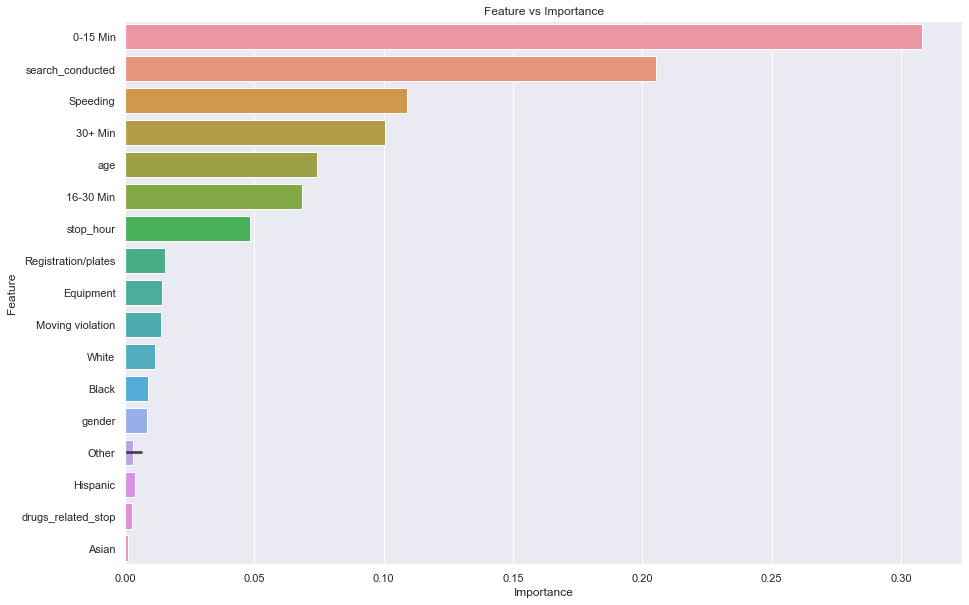

In [86]:
plt.figure(figsize=(15,10))
sns.barplot(x = feature_importance.importance, y = feature_importance.index)
plt.title('Feature vs Importance')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

From the above plot it can be seen that the top features that resulted in arrest were
  - stop duration that were less 15 mins
  - when search was conducted
  - when it was a speeding type of violation
  - stop duration that lasted for more than 30 mins which mean
  - age also seem to be of some importance, which mean that what I said about regarding which age group are likely to commit violation can be used to predict.
  - this show that some arrest were decided very quickly and some took a long time to decide so stop duration seem of little importance here.
  - this show that speeding is a very important indicator of whether an accident will occur or not. Speeding violation should not be taken likely as the majority of accidents occur from it.
  - Race shows little to no importance meaning a race of a person cannot indicated whether that person is going to commit a violation.

### III. Conclusion
  - https://towardsdatascience.com/ways-to-evaluate-regression-models-77a3ff45ba70 (for rmse)
  - https://www.javatpoint.com/rsme-root-mean-square-error-in-python (for rmse)

#### 1. Evaluate the results of the machine learning model.
https://www.obviously.ai/post/machine-learning-model-performance

The accuracy score has already been mentioned in the previous section and they were as follows:

In [87]:
print('Train Accuracy :',accuracy_score(y_train, y_train_pred))
print('Train Recall :', recall_score(y_train, y_train_pred))

Train Accuracy : 0.8745209762000806
Train Recall : 0.8444592790387183


In [88]:
print('Test Accuracy :',accuracy_score(y_test,y_test_pred))
print('Test Recall :',recall_score(y_test,y_test_pred))

Test Accuracy : 0.8686970552642195
Test Recall : 0.7924528301886793


Good accuracy in machine learning is subjective. Anything greater than 70% is a great model performance. In fact, an accuracy measure of anything between 70%-90% is not only ideal, it's realistic. Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data. In both cases I think the model I made is a good model.

In statistical modeling and particularly regression analyses, a common way of measuring the quality of the fit of the model is the RMSE (also called Root Mean Square Deviation). Using RSME, we can easily measure the efficiency of the model.

In [89]:
mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)

print("The difference between actual and predicted values is:")
print(rmse)      

The difference between actual and predicted values is:
0.3623574819646761


From the above result it can be seen that the model I made is an efficient one as the lower the value of the RMSE, the better the model is. RMSE gives an estimation of how well the model is able to predict the target value (accuracy).

#### 2. Reflective evaluation of the developed project

- I have already listed the result i got using the predictive model I made using regression above in the Regression model section last part
- From the result all I can say for certainty is that speeding and whether a search was conducted are the only 2 reliable features that can be used to predict whether a person is likely to commit a traffic violation. The findings of this study (which I by no means say is reliable as the dataset could be biased or I could make mistakes etc.) could help prevent some traffic-violations or reduce the chance of occurrence by finding the attributes of a person who is likely to commit a traffic violation. These results can be used to increase cautions and traffic-safety tips.

Some further finding regarding correlation and information about the features are as follows:
 - There seems to be a record of traffic violations for minimum age as low as 15 and as high as 88 showing no age group is safe from it
 - Frquent form of violation is speeding as expected
 - Drive only during the late evening hours avoiding the 23:00 to 00:00 timeframe and 7:00 to 15:00 timeframe. (Just kidding) 

Whether the project can be reproduced by using different programming languages?


The R language could be used to reproduced this project. The R language has become popular because it lets researchers easily combine different machine learning techniques into a single program. It also provides a simple way to share code between researchers.
 R is great for statistical computing and analysis, while Python is easier to use and read. Python is better than R as it can be used for multiple purposes. It has better scalability, performance, integration, etc. However, if the purpose is data analysis and visualization, R is a better option. So if I wanted better visualisation I could use R.

Future follow up:

I did not have much time to do this project but if I were to get this chance again I would look to find better questions to ask and make a better prediction model. I have made a very simple regression model and as its my first time it took a lot of researching to understand how each part works and I would have changed the direction of the report in the beginning to focus more on the features I had used in the model building. I hope my explanation has been sufficient in regard to explaining each component of my project and the layout has been easy to follow. I tried my best with the time I had. Hope you have liked my study of this dataset.

#### References and Resources

References & resources were included along the way as I progressed with the project as I used referenced for most of the project and it would have taken alot of going back and forth to verify everything